### This notebook processes this project's hypothesis 2: 
#### We expect the waste production trend to be downwards and recovery % to be upwards, especially post 2015 when all UN members agreed to UN’s Sustainable Development Goals (Goal 13: Climate action- Take urgent action to combat climate change and its impacts). The Paris Climate Change Agreement was also launched in 2015 making the hypothesis more sound.

In [22]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from IPython.display import display, HTML
import climate_change_util as cc #Importing util file with functions as module

##### Import the data processing notebook to use the merged dataframe directly

                                         Year  Composting%  Disposal%  \
Year                                 1.000000          NaN        NaN   
Composting%                               NaN     1.000000  -0.682426   
Disposal%                                 NaN    -0.682426   1.000000   
Landfill%                                 NaN    -0.717239   0.962077   
Material_recovery%                        NaN     0.795497  -0.839744   
Recovery%                                 NaN     0.678854  -0.999540   
Recycling%                                NaN          NaN  -0.756778   
Amt_for_recovery_operations               NaN          NaN        NaN   
Composting                                NaN          NaN        NaN   
Electronic_waste                          NaN          NaN        NaN   
Household_waste                           NaN          NaN        NaN   
Landfill                                  NaN          NaN        NaN   
Municipal_waste_generated                 NaN      

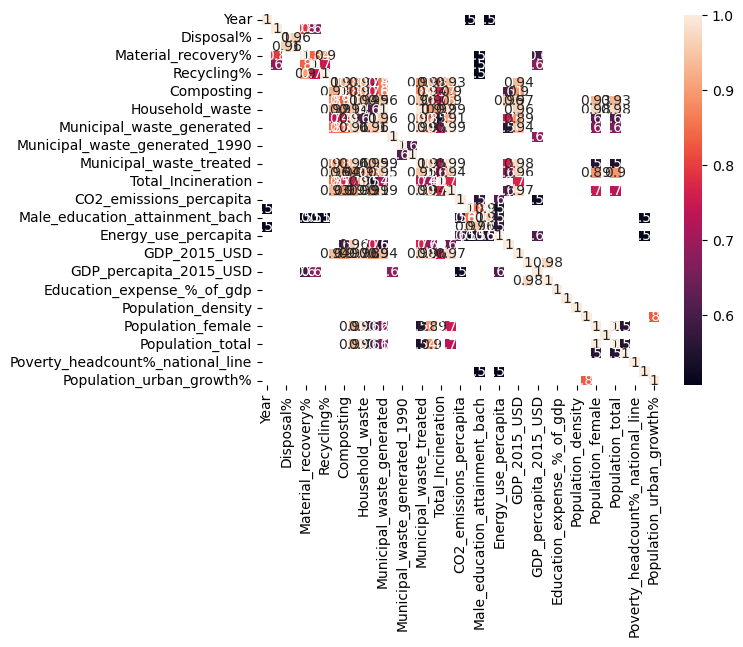

In [5]:
%run climate_change_data_processing.ipynb

In [9]:
pd.set_option('display.max_columns', None)
clean_df.head()

,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,Composting,Electronic_waste,Household_waste,Landfill,Municipal_waste_generated,Municipal_waste_generated_percapita,Municipal_waste_generated_1990,Municipal_waste_generated_2000,Municipal_waste_treated,Recycling,Total_Incineration,Waste_from_households,Country_y,CO2_emissions_percapita,Female_education_attainment_bach,Male_education_attainment_bach,Total_education_attainment_bach,Energy_use_percapita,Forest_area,GDP_2015_USD,GDP_growth%,GDP_percapita_2015_USD,GDP_percapita_growth%,Education_expense_%_of_gdp,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.0,814.0,NaN,NaN,1977.0,3204.0,414.814,100.0,68.963,3513.0,399.0,312.0,2504.0,Austria,7.589364,NaN,NaN,NaN,3240.111359,37756.7,2.406290e+11,4.345641,31340.681293,3.553548,4.95725,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.0,237.0,NaN,NaN,1737.0,3436.0,343.375,100.0,71.131,3961.0,203.0,1784.0,2884.0,Belgium,10.966775,NaN,NaN,NaN,4809.867268,7632.0,2.934562e+11,3.137402,29441.662148,2.830268,NaN,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.6,260.0,NaN,NaN,930.0,4100.6,616.366,100.0,86.675,4100.6,910.6,2000.0,2733.7,Switzerland,6.452219,NaN,NaN,NaN,3627.692811,11535.0,4.714249e+11,3.674626,70199.323900,2.615466,4.38825,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67668.0,NaN,100.0,57.254,NaN,NaN,NaN,NaN,China,1.914543,NaN,NaN,NaN,766.995329,1571405.9,1.027377e+12,3.920251,905.030859,2.406559,NaN,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49857.0,630.670,100.0,94.408,NaN,NaN,NaN,NaN,Germany,12.026609,NaN,NaN,NaN,4421.364531,113000.0,2.342139e+12,5.255006,29485.709974,4.351639,NaN,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365


In [8]:
#subset df with only required columns
#time trend plots
#hist plot
#bar graphs
#box plots for summary stats
#corr plot
#pairwise plot
#correlation matrix
#corr test (pearson)
#conclusion

In [10]:
clean_df.columns

Index(['Year', 'COU', 'Country', 'Composting%', 'Disposal%', 'Landfill%',
       'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_headcount%_ppp',
 

In [14]:
clean_df["Country"].unique()

<StringArray>
[                     'Austria',                      'Belgium',
                  'Switzerland', "China (People's Republic of)",
                      'Germany',                        'Spain',
               'United Kingdom',                       'Greece',
                      'Hungary',                        'Italy',
                        'Japan',                        'Korea',
                   'Luxembourg',                  'Netherlands',
                       'Norway',                  'New Zealand',
                       'Poland',                     'Portugal',
                       'Sweden',                'United States',
                       'Mexico',                      'Türkiye',
                    'Australia',                      'Finland',
                       'France',              'Slovak Republic',
                      'Denmark',               'Czech Republic',
                       'Cyprus',                      'Estonia',
           

### Time Series Trend for Recovery Percentage

#### References and Citation for Code

Code utilized from my homework number 6 notebook

In [30]:
ts1 = clean_df[["Country","Year","Recovery%"]]
ts1

,Country,Year,Recovery%
0,Austria,1990,43.723
1,Belgium,1990,33.249
2,Switzerland,1990,77.320
3,China (People's Republic of),1990,NaN
4,Germany,1990,NaN
...,...,...,...
1071,Poland,2020,58.953
1072,Portugal,2020,46.545
1073,Slovak Republic,2020,50.245
1074,Slovenia,2020,88.977


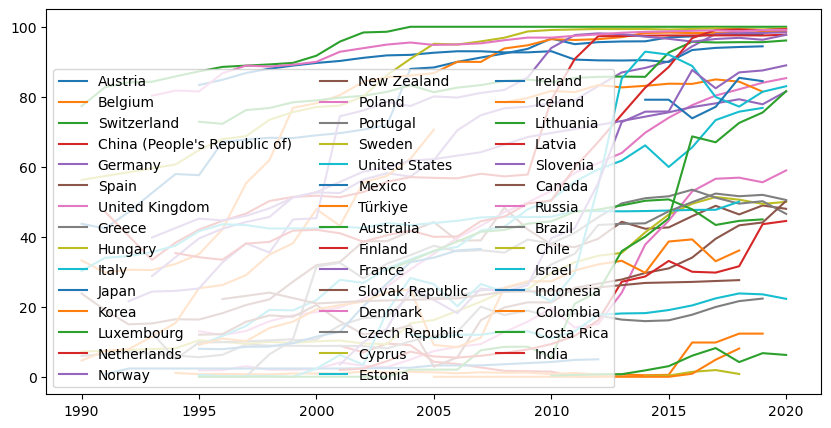

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
for key1 in ts1["Country"].unique():
    ts2 = ts1[ts1["Country"]==key1]
    x1 = ts2["Year"]
    y1 = ts2["Recovery%"]
#     plt.xticks([])
    plt.plot(x1, y1, label = key1)    
    
    
plt.legend(loc="lower left", ncol=len(ts1.columns))
plt.show()
    
# for key1 in np.unique(temp1['Year']):
#     temp3 = temp1.loc[temp1['Year']==key1]
#     x1 = temp3['Week']
#     y1 = temp3['Positive Flu']
#     plt.xticks([])
#     plt.plot(x1, y1, label = key1)    

In [36]:
print(ts1['Country'].nunique())

44


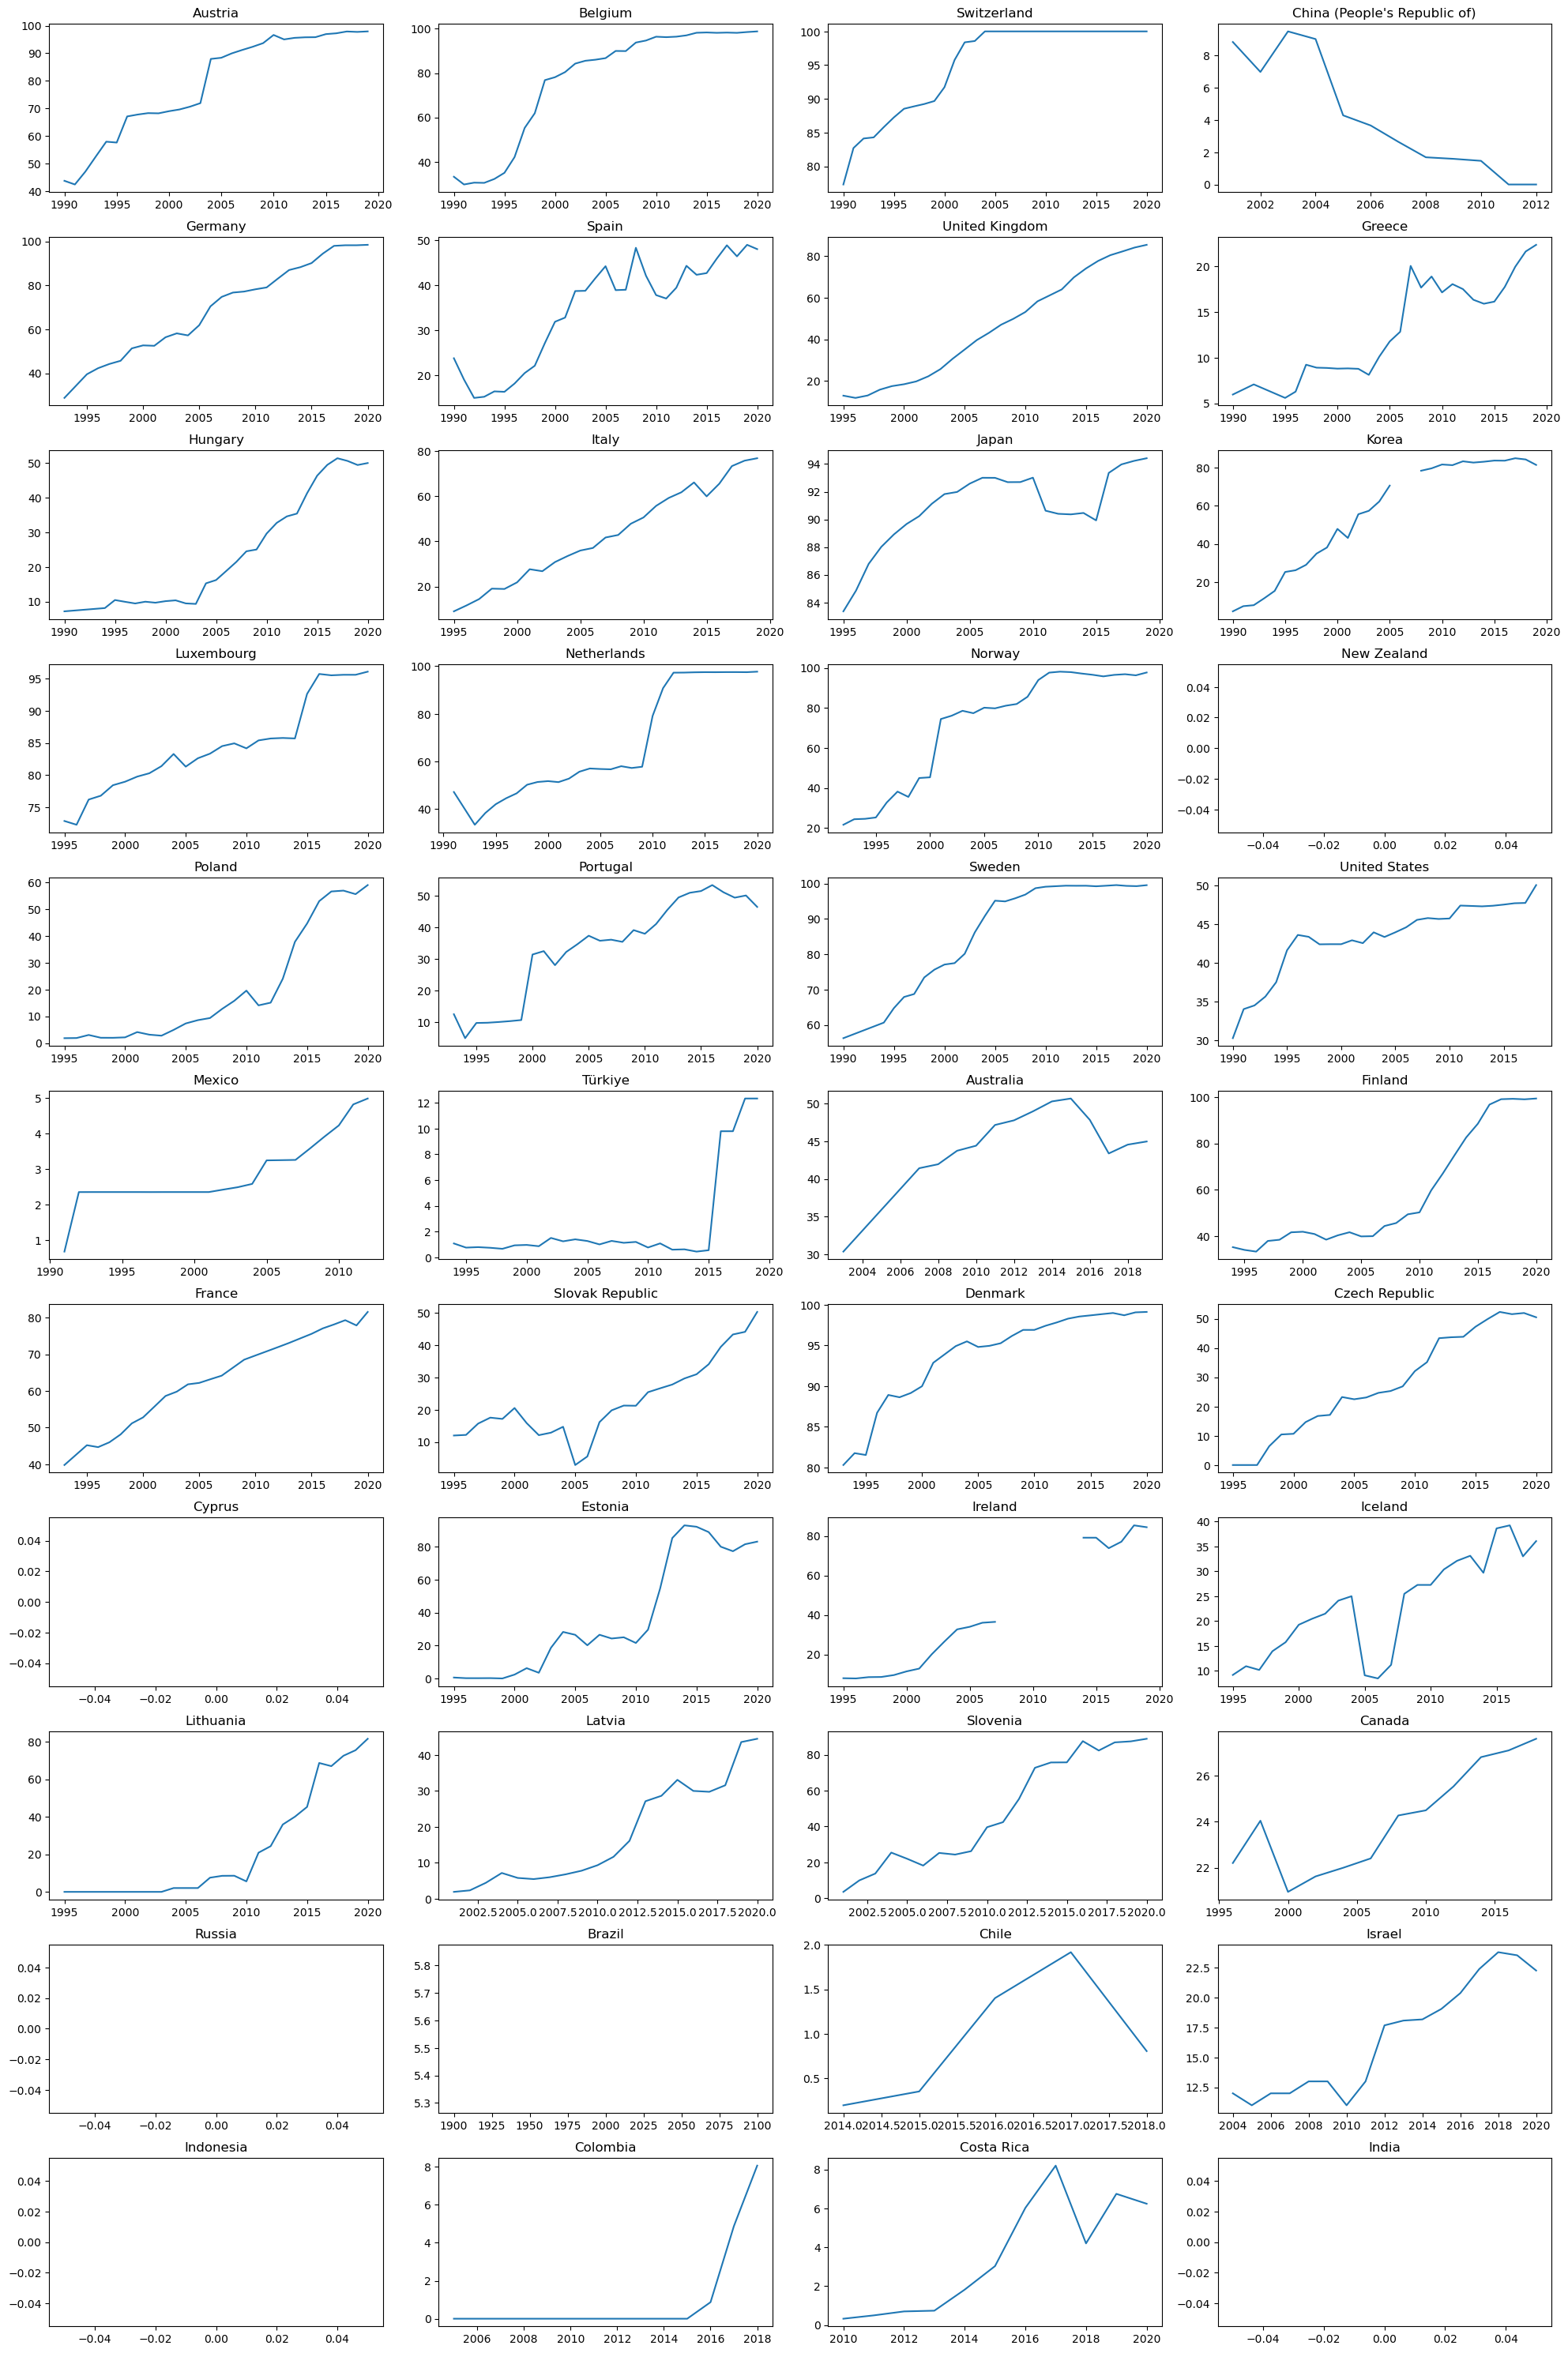

In [69]:
fig, axs = plt.subplots(figsize=(20,30), nrows = 11, ncols = 4)
cnt = 0
fig.tight_layout(pad=2.0)
for key1 in ts1["Country"].unique():
    ts2 = ts1[ts1["Country"]==key1]
    x1 = ts2["Year"]
    y1 = ts2["Recovery%"]
    
    i1 = cnt//4
    j1 = cnt%4
    
    axs[i1,j1].set_title(key1)
    axs[i1,j1].plot(x1, y1)    
    cnt+=1
    

plt.show()
    
# for key1 in np.unique(temp1['Year']):
#     temp3 = temp1.loc[temp1['Year']==key1]
#     x1 = temp3['Week']
#     y1 = temp3['Positive Flu']
#     plt.xticks([])
#     plt.plot(x1, y1, label = key1)    

#### References and Citation for Code

1] Code utilized from my homework number 6 notebook <br>
2] https://stackoverflow.com/questions/22691010/how-to-print-a-groupby-object <br>
3] https://stackoverflow.com/questions/31726643/how-to-plot-in-multiple-subplots <br>
4] https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot <br>
5] https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/ <br>